**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients. (Total 30 marks)

# Install the necessary libraries (1 mark)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")

# import data 2C_weka.csv for 2 Class Classifcation. (1 mark)


In [2]:
df = pd.read_csv("2Classdata.csv")

# Explore the data set.Get necessary information about the data. (4 marks)

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [3]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
df.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [5]:
df.shape

(310, 7)

Dataset has 310 records and 7 columns. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


Looks like there are no null values in the dataset. All columns are float except class which is expected.

In [7]:
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


##### All variables seem to be well distributed. degree_spondylolisthesis looks like rightly skewed as evident from min, max, mean and median values. We will do a boxplot for this variable.

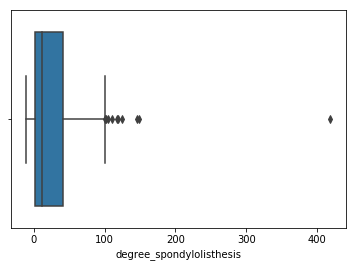

In [8]:
sns.boxplot(df['degree_spondylolisthesis'] )

##### As we observed, this variable is righlty skewed with some extreme values on the right. 

In [9]:
# How many patient categories we have?
df.groupby(['class']).count()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Abnormal,210,210,210,210,210,210
Normal,100,100,100,100,100,100


### We will do some graphical analysis as well to get better picture of variables.

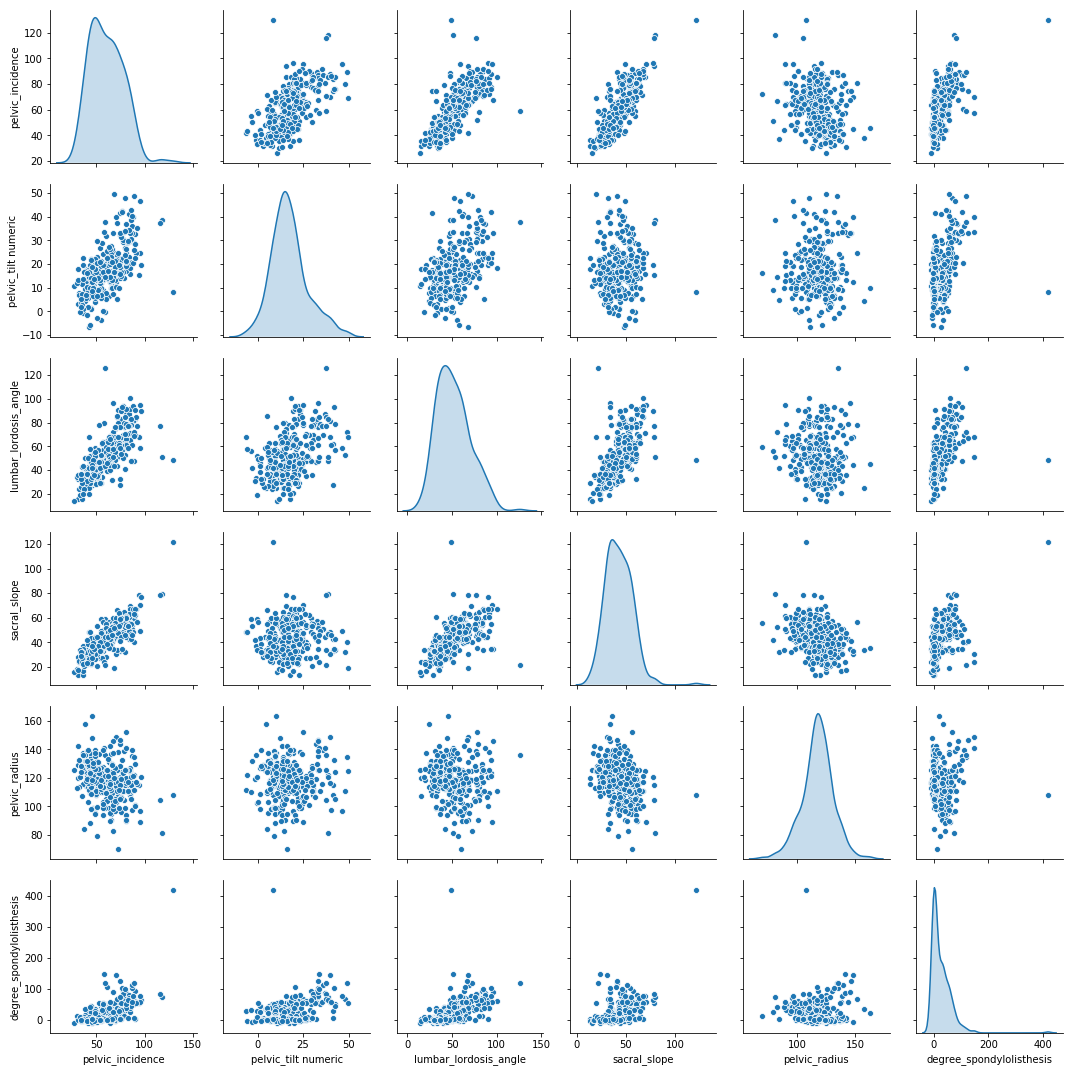

In [10]:
sns.pairplot(df,diag_kind='kde')

There seems to be strong correlations between variables. We will analyze corr matrix to analyze relationships between vriables.

In [11]:
df.corr()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


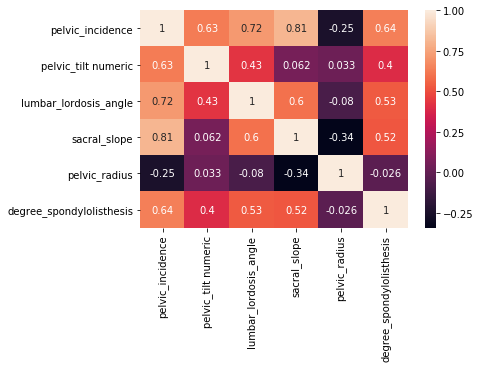

In [12]:
sns.heatmap(df.corr(), annot=True)

variables pelvic_tilt_numeric, lumber_lordosis_angle and sacral_slope have strong correlations with pelvic_incidence. Degree_spondylolisthesis also has strong correlation with pelvic_incidence, lumber_lordosis_angle and sacral_slope.

# Encode the Class variable to integer. (2 marks)

In [13]:
# We will use one hot encoding to encode class to integer.
df['class'] = pd.get_dummies(df['class'], drop_first=True)

In [14]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


# Create the X(Feature-set) and Y(Target-set) sets for your Data. (2 marks)

In [15]:
y = df[['class']]

In [16]:
X = df.drop('class', axis = 1)

In [17]:
X.head(2)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259


In [18]:
y.head(2)

,class
0,0
1,0


# Normalize your Data (X) to get values between 0 to 1. (2 marks)

In [19]:
# We will use MinMax Scaler to normalize the data

In [20]:
scalar = preprocessing.MinMaxScaler()
X[X.columns] = scalar.fit_transform(X[X.columns])

# Split the data as train and test with a ratio of 70:30. (2 marks)

In [21]:
x = X

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 5)

In [23]:
x_train.shape

(217, 6)

# Build the KNN model using Train Dataset and predict the class on test dataset. (2 marks)

##### We will run KNN for defualt n_neighbours=5 and then we will optimize n_neighbours based on train and test accuracies.
#### We will answer next few questions with one chunk of code.

optimal seed value 13
default train accuracy 0.8894009216589862
default test accuracy 0.7634408602150538
Optimal K based on cross_val_score validation is 3
optimal train accuracy based on cv_score 0.8940092165898618
optimal test accuracy based on cv_score 0.7741935483870968


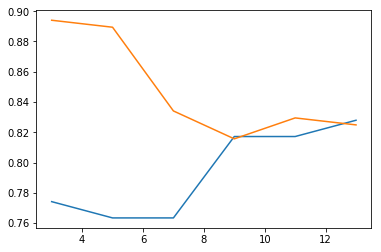

In [24]:
## Just for fun we will run default KNN with different seed values and will pick the seed that gives maximum training score. 
seeds = list(range(1,20))
seed_scores = []
for i in seeds:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = i)
    NNH = KNeighborsClassifier()
    NNH.fit(x_train, y_train)
    seed_scores.append(NNH.score(x_train,y_train))

opt_seed = seeds[seed_scores.index(max(seed_scores))]
print("optimal seed value", opt_seed)

## We will print accuracies with best seed number and default value of n_neighbours

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = opt_seed)
NNH_default = KNeighborsClassifier()
NNH_default.fit(x_train, y_train)
print("default train accuracy", NNH_default.score(x_train, y_train))
print("default test accuracy", NNH_default.score(x_test, y_test))
#print(confusion_matrix(y_test, NNH_default.predict(x_test)))

## Using optimal seed above, we will now run KNN for a range of values (sqrt(datapoints)).
## We will also look at cross_val_score to see if that can help in getting optimal value of K
## Optimizing K value

maxk = int(np.sqrt(x_train.shape[0]))
mylist = list(range(3,maxk))
## filtering for odd values only
neighbors = list(filter(lambda x: x % 2 !=0, mylist))

## Initialize cv_score and accuracy arrays
cv_scores = []
train_acc = []
test_acc = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring = 'accuracy')
    cv_scores.append(scores.mean())
    train_acc.append(knn.score(x_train, y_train))
    test_acc.append(knn.score(x_test, y_test))
    
## Now we will use cv_score to minimize the erorr which will lead us to optimal K value.

misError = [1-x for x in cv_scores]
optimalK = neighbors[misError.index(min(misError))]
print("Optimal K based on cross_val_score validation is",optimalK)

NNH_final = KNeighborsClassifier(n_neighbors = optimalK)
NNH_final.fit(x_train,y_train)
print("optimal train accuracy based on cv_score", NNH_final.score(x_train, y_train))
print("optimal test accuracy based on cv_score", NNH_final.score(x_test, y_test))

## We will plot train and test accuracies with changing K values.
plt.plot(neighbors, test_acc)
plt.plot(neighbors, train_acc)
#plt.plot(neighbors, cv_scores)
plt.show()


#### Based on cv_score it looks like optimal k is 3 but train and test accuracies are not even close to each other. While from the train and test accuracy plots with K, we see that at K of 13 we have highest test accuracy and train and test accuracies are close to each other meaning a stable model.

#### So, we will use optimal K of 13.

In [25]:
NNH_optimized = KNeighborsClassifier(n_neighbors = 13)
NNH_optimized.fit(x_train,y_train)
print("optimal train accuracy", NNH_optimized.score(x_train, y_train))
print("optimal test accuracy", NNH_optimized.score(x_test, y_test))

optimal train accuracy 0.8248847926267281
optimal test accuracy 0.8279569892473119


# Calculate the performance score of of your classification on test dataset. (2 marks)
Hint- You can use knn.score( ) function.

In [26]:
## We will show both default and optimized scores here.
print("Default test accuracy: ",NNH_default.score(x_test, y_test))
print("Optimized test accuracy: ",NNH_optimized.score(x_test, y_test))

Default test accuracy:  0.7634408602150538
Optimized test accuracy:  0.8279569892473119


# What is the best K value for your classifcation?
#Find at which k value you get the best score. (2 marks)

### As we found earlier, model behaves best at K = 13. 

In [27]:
print("optimal train accuracy", NNH_optimized.score(x_train, y_train))
print("optimal test accuracy", NNH_optimized.score(x_test, y_test))

optimal train accuracy 0.8248847926267281
optimal test accuracy 0.8279569892473119


In [28]:
y_pred = NNH_optimized.predict(x_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[57  7]
 [ 9 20]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        64
           1       0.74      0.69      0.71        29

   micro avg       0.83      0.83      0.83        93
   macro avg       0.80      0.79      0.80        93
weighted avg       0.83      0.83      0.83        93



#### Model seems to predict abnomral classes better (f1-score = 0.88) than normal classes (f1-score = 0.71)

### Analyzing the confusion matrix

True Positives (TP): we correctly predicted number of normal classes 20

True Negatives (TN): we correctly predicted number of abnormal classes 57

False Positives (FP): we incorrectly predicted 9 as abnormal when they are actually normal

False Negatives (FN): we incorrectly predicted 7 as normal when they are actually abnormal

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above. (10 marks)

#### For this section, we will use similar methodology as used in 2Class case. We won't be providing much inferences here since the dataset is similar to previous one and carries same characteristics as 2Class dataset except that in this dataset, we will be having 3 classes instead of 2.

In [30]:
df_3 = pd.read_csv("3Classdata.csv")

In [31]:
df_3.head(3)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia


In [32]:
df_3['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [33]:
df_3.tail(3)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [34]:
df_3.shape

(310, 7)

In [35]:
df_3.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [36]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [37]:
df_3.isna().sum()
## No null values exist in the dataset

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

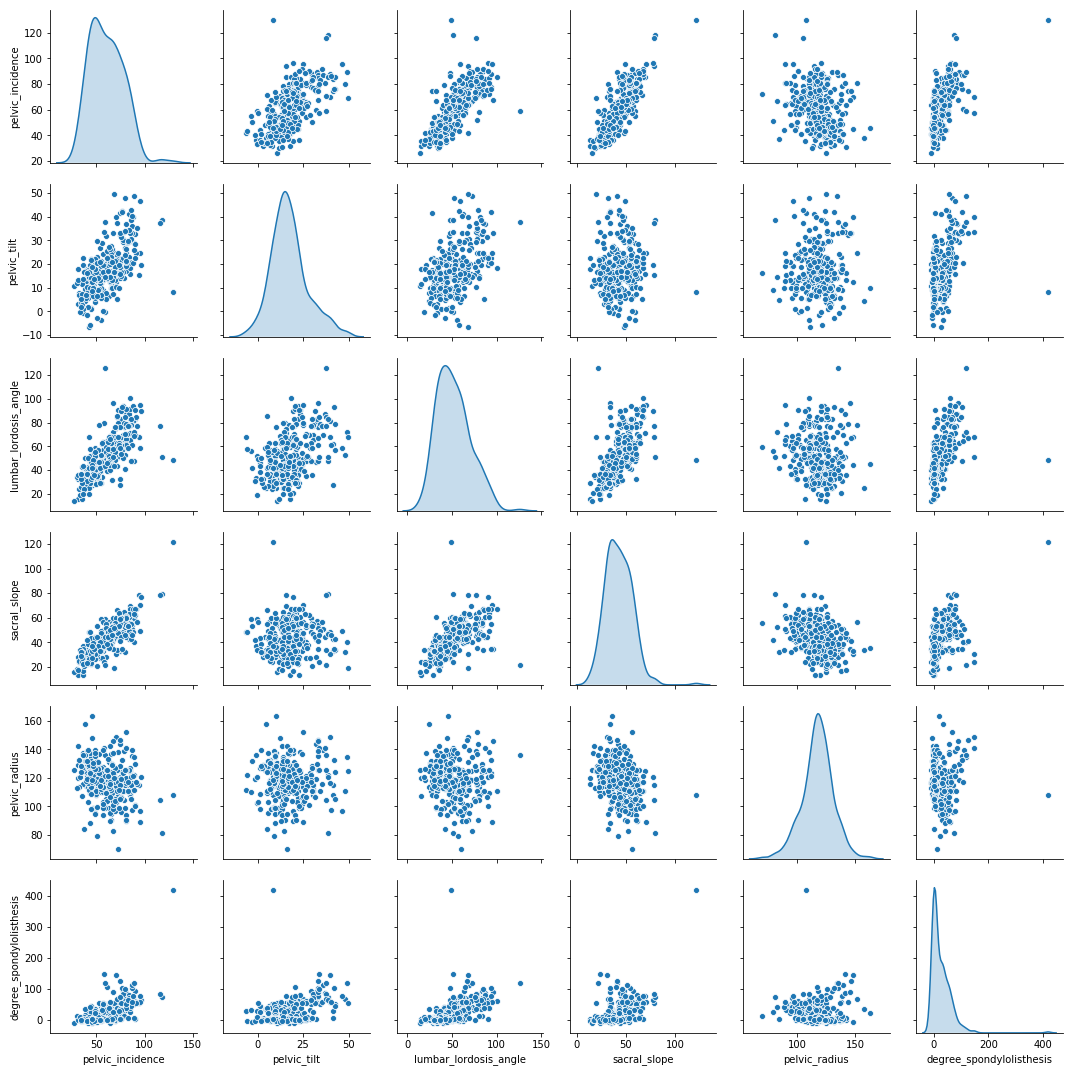

In [38]:
## Pairplot to get understanding of relationship between variables
sns.pairplot(df_3,diag_kind='kde')

In [39]:
### Instead of one hot encoding, we will use Label Encoding in this case since there are more than 2 classes in this data.
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

### Instead of one-hot encoding, we will use label encoding here since we are predicting more than 2 classes of the target variable.


In [40]:
df_3['class']= label_encoder.fit_transform(df_3['class']) 

In [41]:
df_3['class'].unique()

array([0, 2, 1], dtype=int64)

In [42]:
y_2 = df_3[['class']]
X_2 = df_3.drop('class',axis=1)

In [43]:
X_2.head(2)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259


In [44]:
y_2['class'].unique()

array([0, 2, 1], dtype=int64)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.3, random_state = 5)

In [46]:
print(x_train.shape)
print(x_test.shape)

(217, 6)
(93, 6)


optimal seed value 7
default train accuracy 0.8755760368663594
default test accuracy 0.8709677419354839
Optimal K based on cross_val_score validation is 5
optimal train accuracy based on cv_score 0.8755760368663594
optimal test accuracy based on cv_score 0.8709677419354839


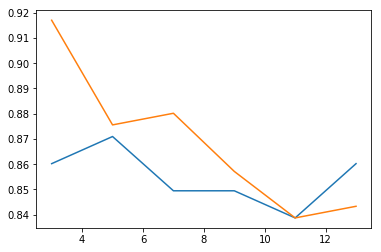

In [47]:
## Just for fun we will run default KNN with different seed values and will pick the seed that gives maximum training score. 
seeds = list(range(1,20))
seed_scores = []
for i in seeds:
    x_train, x_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.3, random_state = i)
    NNH_2 = KNeighborsClassifier()
    NNH_2.fit(x_train, y_train)
    seed_scores.append(NNH.score(x_train,y_train))

opt_seed = seeds[seed_scores.index(max(seed_scores))]
print("optimal seed value", opt_seed)

## We will print accuracies with best seed number and default value of n_neighbours

x_train, x_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.3, random_state = opt_seed)
NNH_default_2 = KNeighborsClassifier()
NNH_default_2.fit(x_train, y_train)
print("default train accuracy", NNH_default_2.score(x_train, y_train))
print("default test accuracy", NNH_default_2.score(x_test, y_test))
#print(confusion_matrix(y_test, NNH_default.predict(x_test)))

## Using optimal seed above, we will now run KNN for a range of values (sqrt(datapoints)).
## We will also look at cross_val_score to see if that can help in getting optimal value of K
## Optimizing K value

maxk_2 = int(np.sqrt(x_train.shape[0]))
mylist_2 = list(range(3,maxk_2))
## filtering for odd values only
neighbors = list(filter(lambda x: x % 2 !=0, mylist_2))

## Initialize cv_score and accuracy arrays
cv_scores_2 = []
train_acc_2 = []
test_acc_2 = []
for k_2 in neighbors:
    knn_2 = KNeighborsClassifier(n_neighbors = k_2)
    knn_2.fit(x_train, y_train)
    scores = cross_val_score(knn_2, x_train, y_train, cv=10, scoring = 'accuracy')
    cv_scores_2.append(scores.mean())
    train_acc_2.append(knn_2.score(x_train, y_train))
    test_acc_2.append(knn_2.score(x_test, y_test))
    
## Now we will use cv_score to minimize the erorr which will lead us to optimal K value.

misError_2 = [1-x for x in cv_scores_2]
optimalK_2 = neighbors[misError_2.index(min(misError_2))]
print("Optimal K based on cross_val_score validation is",optimalK_2)

NNH_final_2 = KNeighborsClassifier(n_neighbors = optimalK_2)
NNH_final_2.fit(x_train,y_train)
print("optimal train accuracy based on cv_score", NNH_final_2.score(x_train, y_train))
print("optimal test accuracy based on cv_score", NNH_final_2.score(x_test, y_test))

## We will plot train and test accuracies with changing K values.
plt.plot(neighbors, test_acc_2)
plt.plot(neighbors, train_acc_2)
#plt.plot(neighbors, cv_scores)
plt.show()


#### cv_score gives an optimal K value of 5 which also seems to give best test accuracy and minimize difference between train and test accuracies. 

#### So, we will use an optimal K value of 5.

In [50]:
NNH_optimized_2 = KNeighborsClassifier(n_neighbors = 5)
NNH_optimized_2.fit(x_train,y_train)
print("optimal train accuracy", NNH_optimized_2.score(x_train, y_train))
print("optimal test accuracy", NNH_optimized_2.score(x_test, y_test))

optimal train accuracy 0.8755760368663594
optimal test accuracy 0.8709677419354839


In [51]:
y_pred_2 = NNH_optimized_2.predict(x_test)
print(confusion_matrix(y_test, y_pred_2))
print(classification_report(y_test, y_pred_2))

[[ 8  3  0]
 [ 7 25  2]
 [ 0  0 48]]
              precision    recall  f1-score   support

           0       0.53      0.73      0.62        11
           1       0.89      0.74      0.81        34
           2       0.96      1.00      0.98        48

   micro avg       0.87      0.87      0.87        93
   macro avg       0.80      0.82      0.80        93
weighted avg       0.88      0.87      0.87        93



#### In this dataset we get a better prediction for class 2 (Spondylolisthesis) with f1-score of 0.98. We were able to predict all of them. While for class 0 (Hernia), we were only able to predict 8 out of the 11 values correctly. 